<a href="https://colab.research.google.com/github/LaurenOKane/Learning-Python/blob/main/L6_BSc_Data_Science_M7T6_Text_Analytics_Natural_Language_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

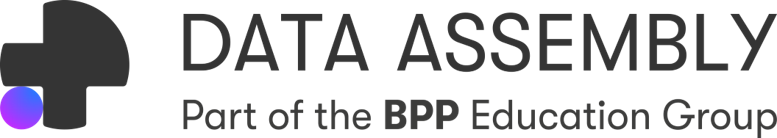

<h3><font color="#AA00BB">How you can use this Notebook</font></h3>
<p>This notebook was written to teach new concepts in data using Python.</p>
<p>You can read through the descriptions run the code (it should work!), or you may be taken through the code by one of our experts.</p>
<p>But one of the best habits to acquire is to re-write the code yourself.</p>
<ul><li>Experiment
<li>Break the code
<li>Build a deeper understanding of both the underlying data concepts and the code</ul>
<p>Don't worry if you make mistakes, we all do. The way to get better and make less mistakes is to write more code.</p>
<p>Enjoy!</p>
<p> - <i><font color="#AA00BB">Data Assembly team.</font></i></p>
<br>

> ❓🤔 = a question for us discuss

> ⌨️ = a task for you to try

> 🔑 = an authoritative reference or guide you may find useful

> 🚀 = **optional** material to develop yourself further


<a name="contents"></a>
## Contents

<br>1. [Loading and EDA on our dataset](#section_1)
<br>2. [Model Training using Sci-kit Learn](#section_2)
<br>3. [Text Pre-processing Processing and Normalisation](#section_3)
<br>4. [Latent Dirichlet Allocation(LDA) - Topic Clusterring](#section_4)
<br>5. [Using Pre-trainined Models for classification](#section_5)

Let's begin!🚀


<h2><font color="#AA00BB">Welcome to our workbook on Text Classification using Natural Language Processing Techniques in Python</font></h2>

Natural Language Processing (NLP) or Text Analytics offers the possibility of seeing beyond raw data and into the heart of human expression, providing invaluable insights for businesses and industries globally.

Text classification in NLP is the **process of categorising textual data into predefined groups based on its content**. Using algorithms, it automatically assigns labels to texts. This task often involves transforming raw text into numerical features, training models on labelled data, and then using these models to classify new, unseen data.

Let's get started!

# **Natural Language Processing - Classifying FitConstrucor Reviews**

**Problem** - FitConstructors marketing team are collecting all FitConstructor bike reviews of the FC Max model online. These reviews are coming from many different websites:
- Amazon
- FitConstructors retail site
- Social media (Facebook, X)
- Message boards (Reddit)

Some of reviews have associated scores, however many (like those on social media or message forums) do not. There's the added problem that sometimes users leave feedback that doesn't align to the review. For example:

  - **Review** - *"This was an AMAZING product"*
  - **Stars** - *1 out of 5*

  The above shows that users may sometimes forgot or mistakenly use the wrong rating score, making it difficult for marketing and product teams to use the review as indicative product feedback.


**Solution** - Building a review classifier that can categorise reviews into 3 categories
- Good
- Neutral
- Bad

**Why?** - This tool allows marketing to simply collect reviews and then our Machine Learning Natural Language Processing Classifier Model can automatically categorise reviews.

When scaling up, FitConstructor expects to receive dozens even hundreds of reviews a day. This tool can automatically.

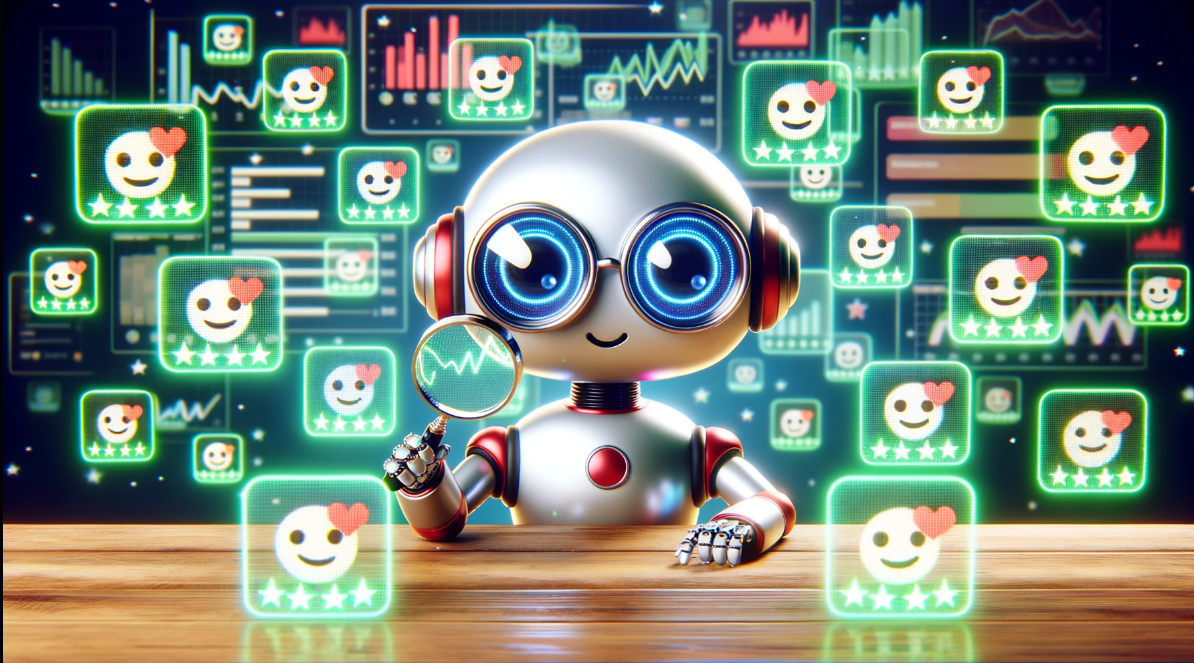

## **Importing Necessary Libraries**

To first perform our classifier task we'll need to utilise some useful Python libraries.

In this block of code, we libraries like `pandas` handle data manipulation, while `nltk` and `gensim` help with text processing, and `sklearn` is for machine learning tasks. Now let's begin!


In [1]:
import pandas as pd
import numpy as np
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
import re
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from gensim.models import Word2Vec, KeyedVectors

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


### **The following libraries are extensively used in NLP work and you can learn more about their capabilities from the official documentation below:**

🔑  - https://www.nltk.org/ - **NLTK** is a leading platform for building Python programs to work with human language data. It provides easy-to-use interfaces to over 50 corpora and lexical resources such as WordNet, along with a suite of text processing libraries for classification, tokenization, stemming, tagging, parsing, and semantic reasoning, wrappers for industrial-strength NLP libraries, and an active discussion forum.


🔑  - https://radimrehurek.com/gensim/auto_examples/index.html - **Gensim** is an open-source library for unsupervised topic modeling, document indexing, retrieval by similarity, and other natural language processing functionalities, using modern statistical machine learning


# **1. Let's Load and Explore the FitConstructor Reviews Dataset**

Here we load a dataset (which is in a CSV) into a DataFrame using the Pandas library.

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/BPP-Digital-Advanced-Data-Analytics/public_datasets/main/fitconstructor/customer_reviews.csv')
data.head()

,Review,Sentiment
0,"Had high hopes, but the resistance levels are ...",Bad
1,Surprised at how intuitive the software is. Wo...,Good
2,Hugely let down by the build quality. Noticed ...,Bad
3,The FC Max is not just a bike; it's a complete...,Good
4,While the technology and features are impressi...,Neutral


We can see, our dataset has just two columns:
- Review - this appears the review text extracted from the customer review
- Sentiment - this is the human labelled category indicating wheather the review was negative, neutral or postive.

Now let's perform some simple **Exploratory Data Anaylsis** on our dataset.

### **1.1 Visualise the distribution of sentiment labels in the dataset.**

- **Why**: To understand the balance of sentiment labels, revealing potential class imbalances that can influence model performance.

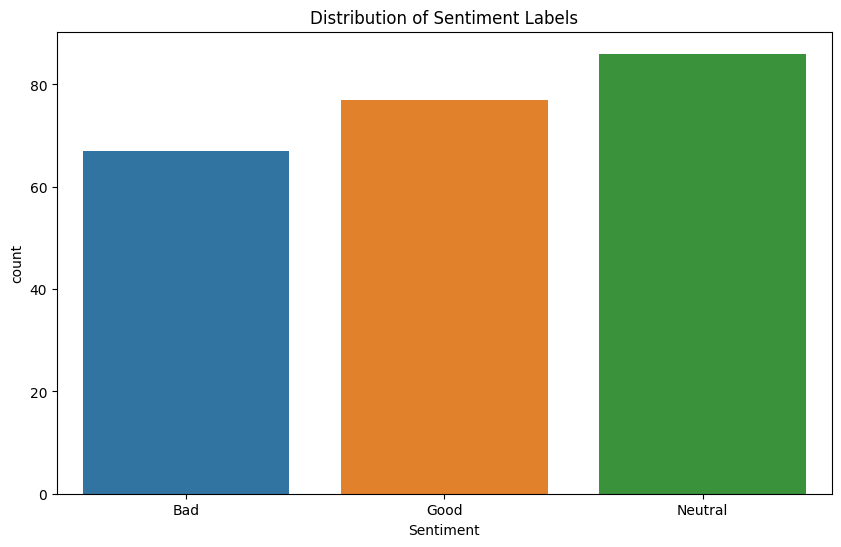

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Lets count the number of time each sentiment label/category occurs in our dataset
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Sentiment')
plt.title('Distribution of Sentiment Labels')
plt.show()

### **1.2 Review Length Distribution to understand the length of reviews across different sentiment categories.**

- **Why**: Observing how review length varies across sentiment categories can indicate if, for instance, negative reviews tend to be longer.

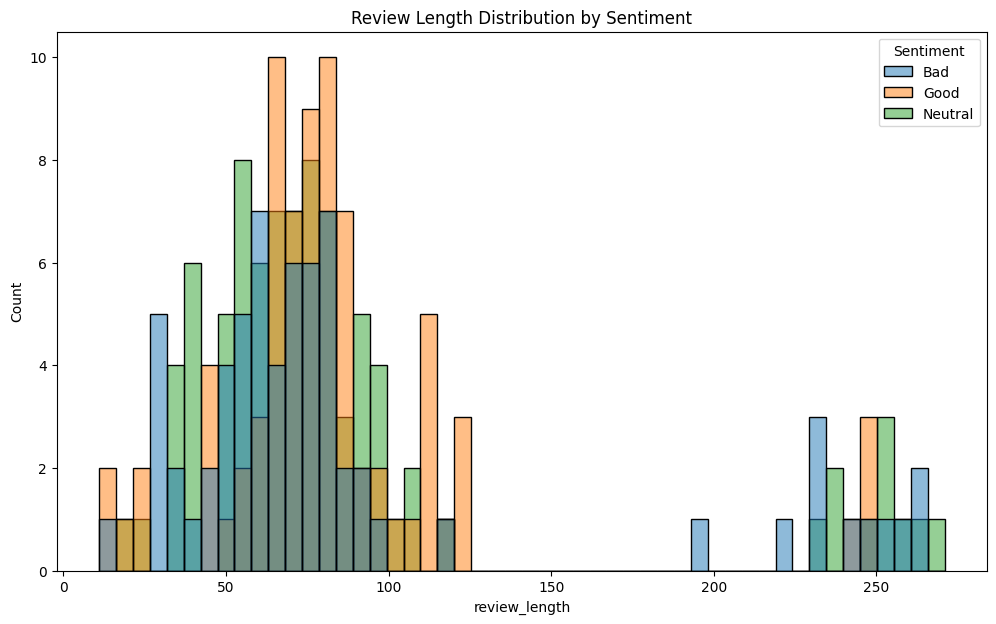

In [4]:
# Let's get the length of each review and create a new column to store the character count.
data['review_length'] = data['Review'].apply(len)

plt.figure(figsize=(12, 7))
sns.histplot(data=data, x='review_length', hue='Sentiment', bins=50)
plt.title('Review Length Distribution by Sentiment')
plt.show()

### **1.3 Violin Plot of Review Length by Sentiment to helps us understand the distribution of review lengths across different sentiments**

- **Why:** Assessing the spread of review lengths for each sentiment provides insights into central tendencies and variations, suggesting if certain sentiments have more verbose expressions.

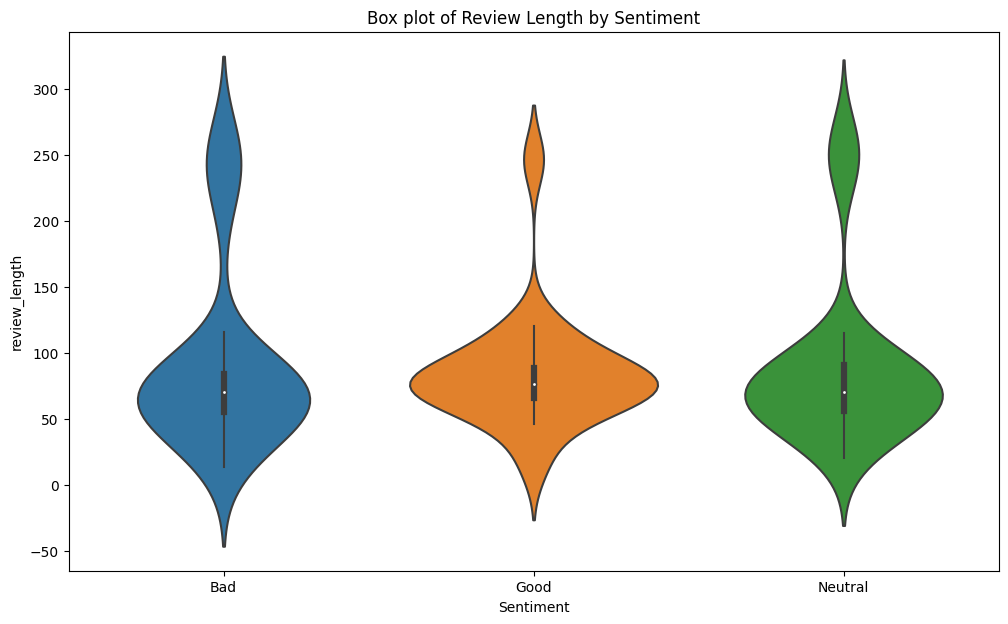

In [5]:
# Let's now plot the character count for each category of review on a Violin plot
# this is a great way to spot outliers (overly long or short reviews) as well as if bad reviews tend to be longer etc.
plt.figure(figsize=(12, 7))
sns.violinplot(data=data, x='Sentiment', y='review_length')
plt.title('Box plot of Review Length by Sentiment')
plt.show()

### **1.4 Visualise the most frequent words in reviews.**

Visualising the most frequent words highlights overarching themes or concerns in reviews, indicating common sentiments.

Note: This requires the wordcloud library

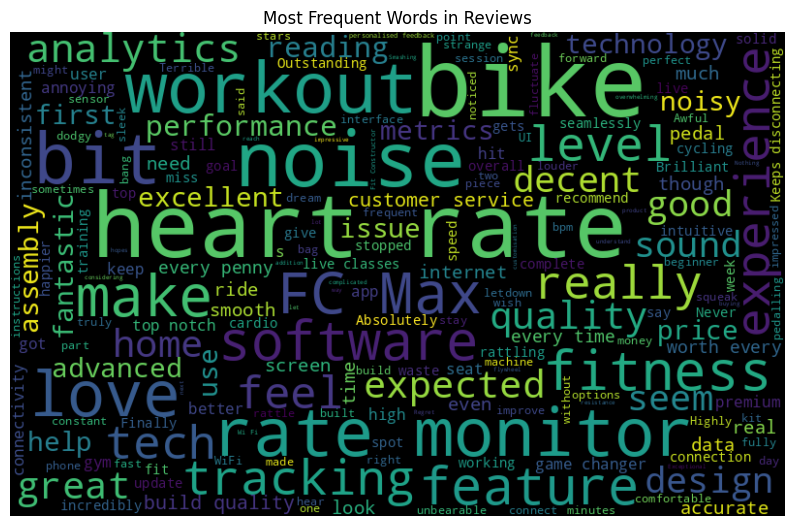

In [6]:
from wordcloud import WordCloud

# To create a word cloud we'll extract all the words into one large list
# then we input that into the WordCloud.generate() function to create our wordcloud plot
all_words = ' '.join([text for text in data['Review']])
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Frequent Words in Reviews')
plt.show()

# **2. Text Pre-processing Processing and Normalisation**

Reviews or most text written online, especially on social media is quite messy riddled with typos, slang, odd characters, emojis etc.

Thus we need to clean up the reviews by removing any unwanted characters and making everything lowercase.

## **2.1 Text Processing and Normalisation**

Cleans each review in the dataset by:
- Removing HTML tags.
- Removing URLs.
- Removing non-alphanumeric characters.
- Converting all text to lowercase.

In [7]:
def clean_text(text):
    """
    Clean the input text by performing the following operations:
    1. Remove any HTML tags.
    2. Remove URLs.
    3. Remove non-alphanumeric characters.
    4. Convert the text to lowercase.

    Parameters:
    - text (str): The input string to be cleaned.

    Returns:
    - str: The cleaned version of the input text.
    """
    # Remove any HTML tags, URLs, and non-alphanumeric characters
    text = re.sub(r'<.*?>', '', text)
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Convert text to lowercase
    text = text.lower()
    return text

data['cleaned_text'] = data['Review'].apply(clean_text)
data.head()

,Review,Sentiment,review_length,cleaned_text
0,"Had high hopes, but the resistance levels are ...",Bad,59,had high hopes but the resistance levels are i...
1,Surprised at how intuitive the software is. Wo...,Good,87,surprised at how intuitive the software is wou...
2,Hugely let down by the build quality. Noticed ...,Bad,79,hugely let down by the build quality noticed a...
3,The FC Max is not just a bike; it's a complete...,Good,247,the fc max is not just a bike its a complete f...
4,While the technology and features are impressi...,Neutral,231,while the technology and features are impressi...


## **2.2 Stopword Removal, Stemming, and Lemmatisation**

We're further refining the reviews by removing common words and simplifying words to their basic forms.

Processes each cleaned review by:
- Removing common words (stopwords) that might not contribute much to the sentiment, such as "and", "the", etc.
- Applying stemming to reduce words to their root form (e.g., "running" becomes "run").
- Lemmatising words to ensure they are in their base/dictionary form (e.g., "better" becomes "good").

In [8]:
# Load NLTK stopwords
stop_words = set(stopwords.words('english'))

# Initialising stemmer and lemmatiser
stemmer = PorterStemmer()
lemmatiser = WordNetLemmatizer()

def process_text(text):
    words = text.split()
    words = [word for word in words if word not in stop_words] # Remove stopwords
    words = [stemmer.stem(word) for word in words] # Stemming
    words = [lemmatiser.lemmatize(word) for word in words] # Lemmatisation
    return ' '.join(words)

data['processed_text'] = data['cleaned_text'].apply(process_text)
data.head()

,Review,Sentiment,review_length,cleaned_text,processed_text
0,"Had high hopes, but the resistance levels are ...",Bad,59,had high hopes but the resistance levels are i...,high hope resist level inconsist
1,Surprised at how intuitive the software is. Wo...,Good,87,surprised at how intuitive the software is wou...,surpris intuit softwar would love scenic ride ...
2,Hugely let down by the build quality. Noticed ...,Bad,79,hugely let down by the build quality noticed a...,huge let build qualiti notic crack base week
3,The FC Max is not just a bike; it's a complete...,Good,247,the fc max is not just a bike its a complete f...,fc max bike complet fit experi track vital off...
4,While the technology and features are impressi...,Neutral,231,while the technology and features are impressi...,technolog featur impress find bike bit complic...


## **2.3 Vectorisation**

We're turning the refined text reviews into a format (numbers) that the computer can understand and work with.

The code below converts the processed text into numerical vectors using the TF-IDF (Term Frequency-Inverse Document Frequency) technique. This transformation is essential as machine learning models require numerical input.

In [9]:
tfidf_vectoriser = TfidfVectorizer(max_features=5000)
X = tfidf_vectoriser.fit_transform(data['processed_text']).toarray()

### **2.4 Train-Test Split**

As you might have seen previous lessons on supervised learning, when training classifiers we need to separate our dataset into a training and test datasets. We set aside some reviews to train our model and some to test how well they've learned.

The code below divides the dataset into training and testing subsets. The training set is used to train the model (80%), and the testing set (20%) is used to evaluate its performance.

In [11]:
y = data['Sentiment'] # assuming your label column is named 'Sentiment'
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## **3. Model Training using Sci-kit Learn**

## **3.1 Train your model**

We're now ready to train our model, here we'll be training three different models to understand and categorise the sentiment of the reviews.

Let's train three these different machine learning classifiers on our dataset:
- Logistic Regression: A linear model suitable for binary and multiclass classification problems.
- Random Forest: An ensemble method that creates a 'forest' of decision trees and outputs the mode of the classes for classification tasks.
- Support Vector Machine (SVM): A model that finds the best hyperplane or decision boundary to classify data points.

In [12]:
# Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# SVM
svm = SVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

## **3.2 Model Performance Comparison**

We're checking how well each model did in understanding and categorising the reviews' sentiments.

The code here now compares the performance of each trained classifier on the test data. The metrics used for evaluation are accuracy and the classification report, which provides precision, recall, f1-score, and support for each class.

In [13]:
# Logistic Regression
print("Logistic Regression Performance:")
print(accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

# Random Forest
print("\nRandom Forest Performance:")
print(accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

# SVM
print("\nSVM Performance:")
print(accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

Logistic Regression Performance:
0.8043478260869565
              precision    recall  f1-score   support

         Bad       0.80      0.73      0.76        11
        Good       0.83      0.77      0.80        13
     Neutral       0.79      0.86      0.83        22

    accuracy                           0.80        46
   macro avg       0.81      0.79      0.80        46
weighted avg       0.81      0.80      0.80        46


Random Forest Performance:
0.6739130434782609
              precision    recall  f1-score   support

         Bad       0.67      0.73      0.70        11
        Good       0.61      0.85      0.71        13
     Neutral       0.75      0.55      0.63        22

    accuracy                           0.67        46
   macro avg       0.68      0.71      0.68        46
weighted avg       0.69      0.67      0.67        46


SVM Performance:
0.782608695652174
              precision    recall  f1-score   support

         Bad       0.78      0.64      0.70     

## **Model results**

We can see that both the SVM and Logistic Regression have attained the highest accuracies with the Logistic Regression model being slightly better at 80% accuracy versus 78%.

# **4. Topic Modeling / Clusterring with Latent Dirichlet Allocation(LDA)**

LDA, or Latent Dirichlet Allocation, is a **topic modelling algorithm** that identifies topics within a collection of documents by allocating various words to specific topics based on probability and co-occurrence patterns. It aims to discover the underlying thematic structure in a corpus.

The code below first cleans and preprocesses customer reviews from a dataset, removing stopwords, stemming, and lemmatising the words. Then, it applies the TF-IDF vectorisation technique to transform the text and subsequently applies LDA to identify prevalent topics within the reviews.

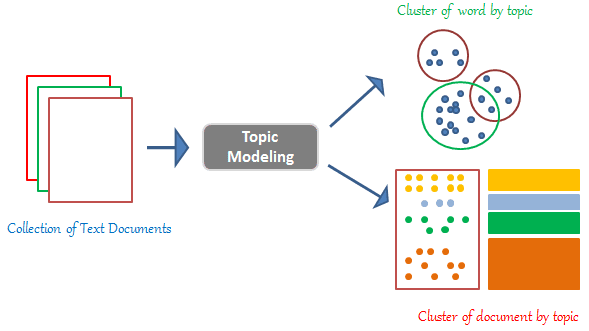

In [17]:
import gensim
from gensim import corpora

# Since you've already preprocessed the text:
reviews_clean = data['processed_text'].apply(str.split).tolist()

# Preparing Document-Term Matrix
dictionary = corpora.Dictionary(reviews_clean)
doc_term_matrix = [dictionary.doc2bow(review) for review in reviews_clean]

# LDA Model Training
num_topics = 2 # You can adjust this based on your dataset and requirements.
lda_model = gensim.models.ldamodel.LdaModel(doc_term_matrix, num_topics=num_topics, id2word=dictionary, passes=15)

# Displaying Topics
topics = lda_model.print_topics(num_topics=num_topics, num_words=5)
for topic in topics:
    print(topic)

# format and display the topics in a clearer way:
print("Identified Topics:\n")
for idx, topic in enumerate(topics):
    topic_words = topic[1].split(" + ")
    formatted_words = [word.split("*")[1].replace('"', '') for word in topic_words]
    print(f"Topic {idx + 1}: {', '.join(formatted_words)}\n")

(0, '0.035*"rate" + 0.034*"heart" + 0.018*"monitor" + 0.015*"nois" + 0.012*"workout"')
(1, '0.032*"bike" + 0.014*"fit" + 0.013*"like" + 0.011*"fc" + 0.011*"max"')
Identified Topics:

Topic 1: rate, heart, monitor, nois, workout

Topic 2: bike, fit, like, fc, max



We can see 3 topic themes emerge.

Topic 1 - appears to be about noise and the heart rate monitor
Topic 2 - this topic seems to be about the quality and analytics. There's also mention of help, maybe alluding to some users needing help to understand


The truncated words in the LDA output result from the stemming and lemmatisation processes applied during text preprocessing. To make the output more interpretable, consider using only lemmatisation or revising the order of these processes.

---

# **5. Using Pre-trainined Models for classification**



Classifying text sentiment isn't a new problem. In fact, many deep learning models have been trained on massive datasets doing just that. Sometimes, insteado of re-inventing the wheel it's worth checking to see what types of performance we can achieve using these pretrained models.

Using pretrained models is advantageous because:

- **Efficiency**: They save a significant amount of time as you don't have to train a model from scratch.
- **Data**: Training deep learning models requires large datasets, which might not always be available. Pretrained models leverage massive datasets and have already captured general patterns.
- **Computing Resources:** Training models, especially deep learning ones, demands high computational power. With pretrained models, you can bypass this requirement.
- **Performance**: They often provide state-of-the-art performance and serve as a robust starting point, even if further fine-tuning is needed for specific tasks.
---

We're going to use the popular pretrained model **BERT** (Bidirectional Encoder Representations from Transformers).

- **BERT**: A state-of-the-art deep learning model for NLP tasks, it understands the context of words in a sentence by analysing both left and right sides of each word, making it powerful for sentiment analysis.

In [18]:
# Install the libraries that allow us to use a few pretrained models.
!pip install pandas transformers

from transformers import BertTokenizer, BertForSequenceClassification
tokenizer = BertTokenizer.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')
model = BertForSequenceClassification.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

tokenizer_config.json:   0%|          | 0.00/39.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/872k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/953 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/669M [00:00<?, ?B/s]

In [20]:
# Importing necessary libraries
from transformers import BertTokenizer, BertForSequenceClassification, pipeline
import torch

# BERT Sentiment Analysis

# Load pretrained BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')
model = BertForSequenceClassification.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')
nlp = pipeline('sentiment-analysis', model=model, tokenizer=tokenizer)

def bert_sentiment(text):
    # Get BERT's sentiment prediction
    result = nlp(text)[0]
    # Map star ratings to 'Good', 'Neutral', and 'Bad'
    if result['label'] in ['5 stars', '4 stars']:
        return "Good"
    elif result['label'] == '3 stars':
        return "Neutral"
    else: # '2 stars' and '1 star'
        return "Bad"

# Apply BERT sentiment analysis on the cleaned text
data['BERT_predictions'] = data['cleaned_text'].apply(bert_sentiment)

# Summarise performance in a DataFrame
performance_summary = {
    'Model': ['BERT'],
    'Accuracy': [
        accuracy_score(data['Sentiment'], data['BERT_predictions'])
    ]
}
# Create a DataFrame to display model performance
performance_df = pd.DataFrame(performance_summary)

performance_df

,Model,Accuracy
0,BERT,0.856522


## **Results Analysis**

Here we can see BERT has performed best with 85.6% vs 80.4% which was attained by our Logestic Regression model. This shows that we often don't have to train our own models for our specific application. It's always worth exploring how pretrained models performed and then using their score as benchmark that we can aim to beat with training out own model.

In [21]:
# Let's examine the results
data.head()

,Review,Sentiment,review_length,cleaned_text,processed_text,BERT_predictions
0,"Had high hopes, but the resistance levels are ...",Bad,59,had high hopes but the resistance levels are i...,high hope resist level inconsist,Bad
1,Surprised at how intuitive the software is. Wo...,Good,87,surprised at how intuitive the software is wou...,surpris intuit softwar would love scenic ride ...,Neutral
2,Hugely let down by the build quality. Noticed ...,Bad,79,hugely let down by the build quality noticed a...,huge let build qualiti notic crack base week,Bad
3,The FC Max is not just a bike; it's a complete...,Good,247,the fc max is not just a bike its a complete f...,fc max bike complet fit experi track vital off...,Good
4,While the technology and features are impressi...,Neutral,231,while the technology and features are impressi...,technolog featur impress find bike bit complic...,Neutral


## **⌨️Exercise 🚀(OPTIONAL)**
**QUESTION 1 - Easy: Implement a Count Vectoriser and compare its performance with the TF-IDF Vectoriser for the classifiers. Which one provides better accuracy?**

**Hints:**
- Import the CountVectorizer from `sklearn.feature_extraction.text.`
- Just like the TF-IDF Vectoriser, initialise the Count Vectoriser and fit-transform your pre-processed text data.
- Use the output matrix to train your classifier.
- Evaluate the classifier's performance using accuracy or any other metric of choice.
- Compare this performance metric with the metric obtained from the TF-IDF Vectoriser.

**QUESTION 2 - Medium: Experiment with different numbers of topics in LDA. Plot the coherence score against the number of topics to identify the optimal number of topics for the dataset.**

**Hints:**

- Choose a range of topic numbers you want to test, e.g., from 2 to 20.
- For each number in this range, fit the LDA model and calculate its coherence score. Libraries like gensim offer tools to compute coherence scores.
- Use the CoherenceModel from `gensim.models.coherencemodel` with your model, tokenised texts, dictionary, and a coherence measure (e.g., 'c_v').
- Call the `get_coherence()` method on the CoherenceModel object to get the coherence score.
- Store the coherence scores associated with each number of topics.
- Using a library like `matplotlib`, plot the coherence scores (y-axis) against the number of topics (x-axis).
- The optimal number of topics usually corresponds to a peak in the coherence score, so identify the number of topics at which the coherence score is maximised.

**Note**: The coherence score measures the semantic similarity between the highest scoring words within topics, with higher scores indicating that the words in the topic cohesively represent a single theme.

**QUESTION 3 - Hard: Extract additional textual features like the length of reviews, average word length, and sentiment polarity. Incorporate these features into the model training and compare the results.**

**Hints:**

- To calculate the length of reviews, you can simply apply the len function to each text entry.
- For the average word length, split each text entry by spaces and calculate the mean length of the words.
- Sentiment polarity can be calculated using libraries like TextBlob. After installing it, initialise a TextBlob object with your text and access the .polarity attribute.
- Once you have these additional features, concatenate them with your TF-IDF or Count Vectorised matrix.
- Train your classifier using this combined feature set and evaluate its performance.
- Compare the results with the model trained using just the TF-IDF or Count Vectorised matrix.

Example:



```
# pip install textblob
from textblob import download_corpora
download_corpora.download_all()

from textblob import TextBlob

# Sample text
sample_text = "I love this product!"

# Create a TextBlob object
blob = TextBlob(sample_text)

# Get sentiment polarity
polarity = blob.sentiment.polarity

print(f"Sentiment polarity of the text is: {polarity}")

data['sentiment_polarity'] = data['Review'].apply(lambda x: TextBlob(x).sentiment.polarity)


```

